<a href="https://colab.research.google.com/github/sheikh-sahira1703/algo_trading_course/blob/master/stock_analysis_with_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
Prepared by:
Aayushmaan Jain
J022
Semester 3
BTech Data Science 
```






This is a python notebook intended to help you with basic stock analysis along with the visulalizations.

Precautions and advices

1) This notebook uses Yahoo Finance as it's source of financial data by default, if you intend to use a different source then please edit the 
argument 'source' of the DataReader function 

2) The case in which you enter the stock does not matter as the stock name will be converted to upper case 

3) The separator you use while entering the dates does not matter as the date accepts both separators like '/' and '-' but please enter the date in YYYY/MM/DD format





Imports

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from pandas_datareader import data
from pandas_datareader.data import DataReader
from datetime import datetime
from scipy import stats
import statistics
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


User inputs

In [48]:
print('Enter quit to stop')
stock_list = list()
while True:
  stock = input('Enter a stock name according to yahoo finance search: ')
  if stock.upper().startswith('QUIT'):
    break
  else:
    stock_list.append(stock.upper())
from_date = input('Enter the from date in yyyy/mm/dd format ')
from_date = re.split('-|/', from_date)
to_date = input('Enter the to date in yyyy/mm/dd format ')
to_date = re.split('-|/', to_date)
for i in range(len(from_date)):
  from_date[i] = int(from_date[i])
for j in range(len(to_date)):
  to_date[j] = int(to_date[j])

Enter quit to stop
Enter a stock name according to yahoo finance search: aapl
Enter a stock name according to yahoo finance search: msft
Enter a stock name according to yahoo finance search: goog
Enter a stock name according to yahoo finance search: fb
Enter a stock name according to yahoo finance search: baba
Enter a stock name according to yahoo finance search: tsla
Enter a stock name according to yahoo finance search: nvda
Enter a stock name according to yahoo finance search: crm
Enter a stock name according to yahoo finance search: quit
Enter the from date in yyyy/mm/dd format 2020-01-01
Enter the to date in yyyy/mm/dd format 2020-09-14


In [49]:
column_name = input('Enter the column you would like to consider for analysis (case sensitive): ')
final_dataframe = pd.DataFrame()
try:
  for stock in stock_list:
    historical_data = DataReader(stock,  "yahoo", datetime(from_date[0], from_date[1], from_date[2]), datetime(to_date[0], to_date[1], to_date[2]))
    final_dataframe[stock] = historical_data[column_name]
except:
  print('Please enter a valid input')
# final_dataframe

Enter the column you would like to consider for analysis (case sensitive): Adj Close


Calculating Returns

In [50]:
# return_dataframe = pd.DataFrame(final_dataframe.iloc[1:].values/final_dataframe.iloc[:-1].values -1)
return_dataframe = final_dataframe.pct_change()
return_dataframe = return_dataframe.dropna()
return_dataframe.columns = stock_list
return_dataframe

,AAPL,MSFT,GOOG,FB,BABA,TSLA,NVDA,CRM
Date,,,,,,,,
2020-01-03,-0.009722,-0.012452,-0.004907,-0.005291,-0.012604,0.029633,-0.016006,-0.004911
2020-01-06,0.007968,0.002585,0.024657,0.018834,-0.001659,0.019255,0.004194,0.043811
2020-01-07,-0.004703,-0.009118,-0.000624,0.002164,0.004570,0.038801,0.012107,0.014702
2020-01-08,0.016086,0.015928,0.007880,0.010138,0.001700,0.049205,0.001876,0.007557
2020-01-09,0.021241,0.012493,0.011044,0.014311,0.017339,-0.021945,0.010983,0.012801
...,...,...,...,...,...,...,...,...
2020-09-08,-0.067295,-0.054096,-0.036863,-0.040922,-0.040407,-0.210628,-0.056209,-0.052729
2020-09-09,0.039887,0.042584,0.016034,0.009441,0.011592,0.109234,0.067321,0.037966
2020-09-10,-0.032646,-0.028018,-0.016018,-0.020568,-0.020502,0.013815,-0.031715,-0.010502


Histogram

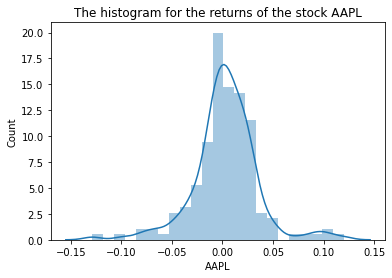

The histogram shows that the returns of AAPL oscillate around [-0.12864692]
The average return of this stock is 0.002994433656186946
The median return of this stock is 0.0031894425681280314
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


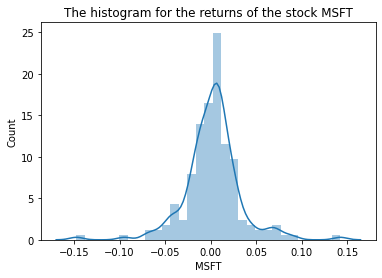

The histogram shows that the returns of MSFT oscillate around [-0.14739027]
The average return of this stock is 0.0019318352921415128
The median return of this stock is 0.003303248785854196
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


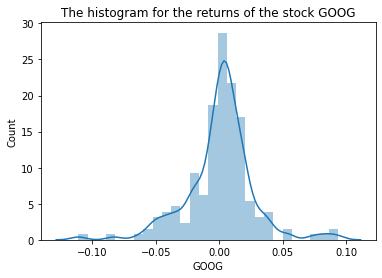

The histogram shows that the returns of GOOG oscillate around [-0.1110082]
The average return of this stock is 0.0009501365077339841
The median return of this stock is 0.004096432513630899
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


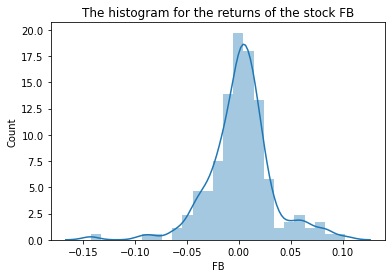

The histogram shows that the returns of FB oscillate around [-0.14252998]
The average return of this stock is 0.001835501204521455
The median return of this stock is 0.0027175488961471705
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


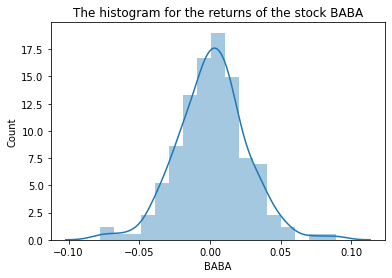

The histogram shows that the returns of BABA oscillate around [-0.07809275]
The average return of this stock is 0.0015584001181389855
The median return of this stock is 0.001434412944986918
This stock is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan
Please look out for the outliers also


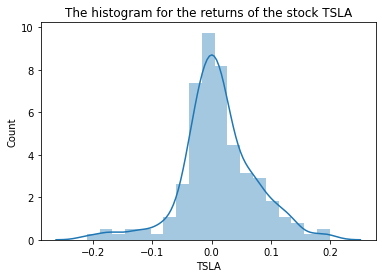

The histogram shows that the returns of TSLA oscillate around [-0.21062826]
The average return of this stock is 0.010998538582873925
The median return of this stock is 0.004993560995223745
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


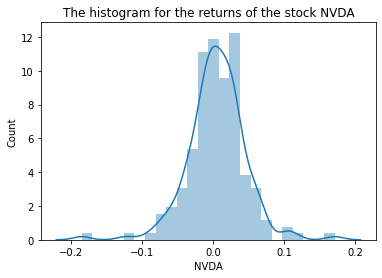

The histogram shows that the returns of NVDA oscillate around [-0.18452088]
The average return of this stock is 0.005184984176471817
The median return of this stock is 0.004803608357831446
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


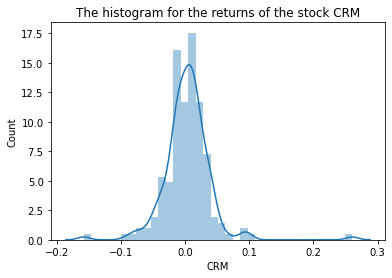

The histogram shows that the returns of CRM oscillate around [-0.1588848]
The average return of this stock is 0.002883674837741529
The median return of this stock is 0.0033379735645167052
This stock is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan
Please look out for the outliers also


In [51]:
for stock in stock_list:
  title = 'The histogram for the returns of the stock {stock}'.format(stock = stock)
  sns.distplot(return_dataframe[stock]).set_title(title)
  plt.ylabel('Count')
  plt.show()
  print('The histogram shows that the returns of', stock, 'oscillate around', stats.mode(return_dataframe[stock])[0])
  print('The average return of this stock is', np.mean(return_dataframe[stock]))
  print('The median return of this stock is', np.median(return_dataframe[stock]))
  if return_dataframe[stock].skew()>0:
    print('This stock is positively skewed which indicates that there are more positive returns which is a good sign for the stock')
    print('This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan')
  elif return_dataframe[stock].skew()<0:
    print('This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock')
    print('This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan')
  else:
    print('The stock is not skewed which means both the returns are equally likely')
  print('Please look out for the outliers also')

Boxplots

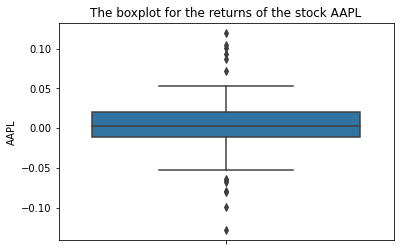

From this boxplot we can see that the median retruns of this stock AAPL is  0.0031894425681280314
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


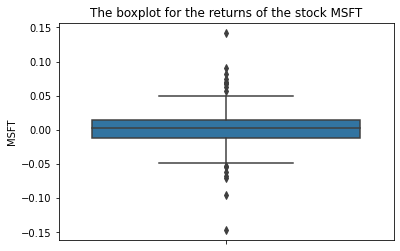

From this boxplot we can see that the median retruns of this stock MSFT is  0.003303248785854196
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


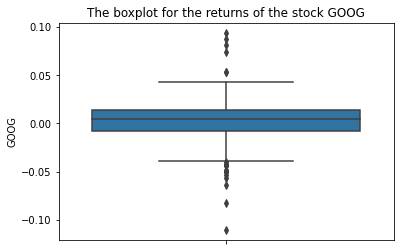

From this boxplot we can see that the median retruns of this stock GOOG is  0.004096432513630899
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


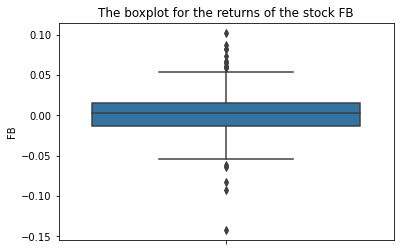

From this boxplot we can see that the median retruns of this stock FB is  0.0027175488961471705
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


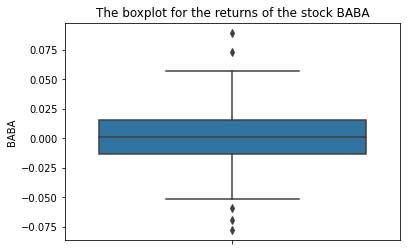

From this boxplot we can see that the median retruns of this stock BABA is  0.001434412944986918
From this boxplot we can see that there are more positive returns in this stock
This can be seen in the boxplot as there are more returns above the median i.e there is more data above the median than below the median
Please watch out for the outliers


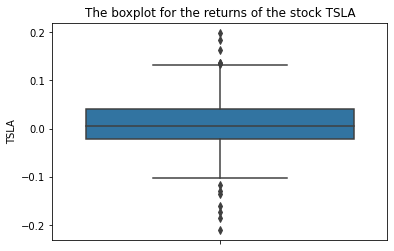

From this boxplot we can see that the median retruns of this stock TSLA is  0.004993560995223745
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


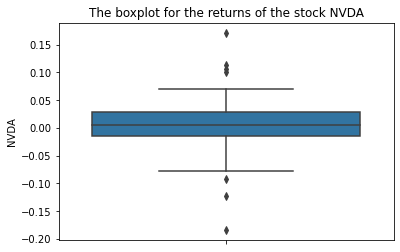

From this boxplot we can see that the median retruns of this stock NVDA is  0.004803608357831446
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


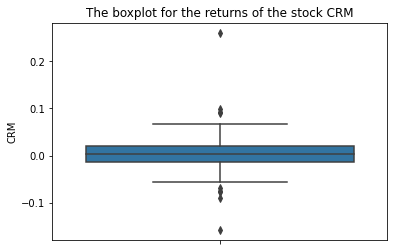

From this boxplot we can see that the median retruns of this stock CRM is  0.0033379735645167052
From this boxplot we can see that there are more positive returns in this stock
This can be seen in the boxplot as there are more returns above the median i.e there is more data above the median than below the median
Please watch out for the outliers


In [52]:
for stock in stock_list:
  title = 'The boxplot for the returns of the stock {stock}'.format(stock = stock)
  sns.boxplot(y=return_dataframe[stock]).set_title(title)
  plt.show()
  print('From this boxplot we can see that the median retruns of this stock', stock, 'is ', np.median(return_dataframe[stock]))
  if return_dataframe[stock].skew()>0:
    print('From this boxplot we can see that there are more positive returns in this stock')
    print('This can be seen in the boxplot as there are more returns above the median i.e there is more data above the median than below the median')
  elif return_dataframe[stock].skew()<0:
    print('From this boxplot we can see that there are more negative returns in this stock')
    print('This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median')
  else:
    print('The returns are not skewed and the positive returns and the negative returns are equally likely')
  print('Please watch out for the outliers')

Time Series Plots

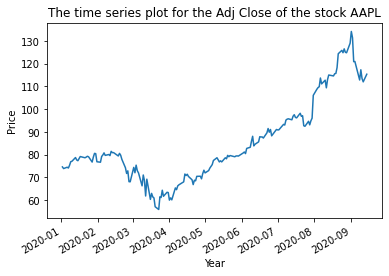

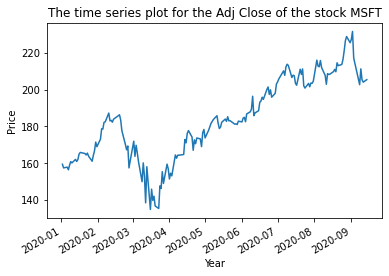

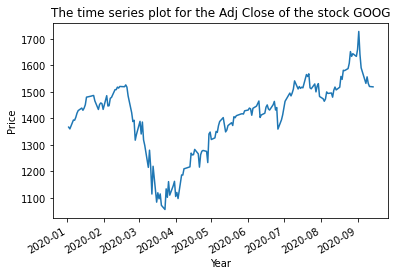

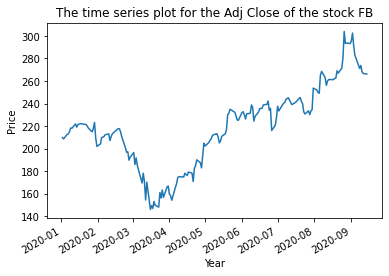

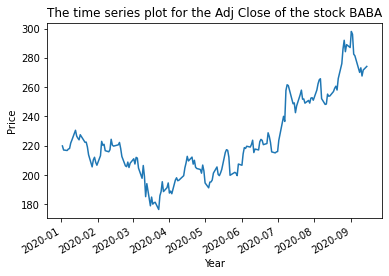

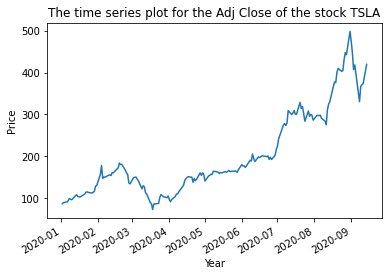

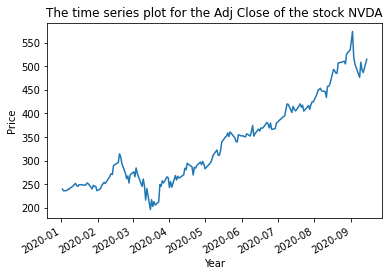

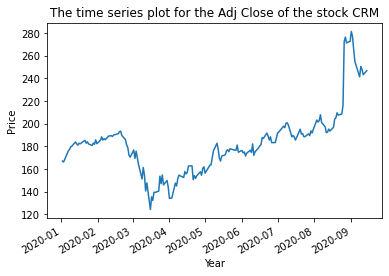

In [53]:
for stock in stock_list:
  final_dataframe[stock].plot()
  title = 'The time series plot for the {column} of the stock {stock}'.format(column = column_name, stock = stock)
  plt.xlabel('Year');
  plt.ylabel('Price')
  plt.title(title)
  plt.show()

Descriptive Statistics

In [54]:
print('Mean returns:')
np.mean(return_dataframe)

Mean returns:


AAPL    0.002994
MSFT    0.001932
GOOG    0.000950
FB      0.001836
BABA    0.001558
TSLA    0.010999
NVDA    0.005185
CRM     0.002884
dtype: float64

In [55]:
print('Median Returns')
for stock in stock_list:
  print(stock, np.median(return_dataframe[stock]))

Median Returns
AAPL 0.0031894425681280314
MSFT 0.003303248785854196
GOOG 0.004096432513630899
FB 0.0027175488961471705
BABA 0.001434412944986918
TSLA 0.004993560995223745
NVDA 0.004803608357831446
CRM 0.0033379735645167052


In [56]:
print('Mode Returns: ')
for stock in stock_list:
  print(stock, stats.mode(return_dataframe[stock])[0])

Mode Returns: 
AAPL [-0.12864692]
MSFT [-0.14739027]
GOOG [-0.1110082]
FB [-0.14252998]
BABA [-0.07809275]
TSLA [-0.21062826]
NVDA [-0.18452088]
CRM [-0.1588848]


In [57]:
print('Skewness')
for stock in stock_list:
  print(stock, return_dataframe[stock].skew())

Skewness
AAPL -0.07826044441822379
MSFT -0.06516202186542953
GOOG -0.21571122240720345
FB -0.2946354973652224
BABA 0.05926687171588154
TSLA -0.19649898292391507
NVDA -0.28945548293247664
CRM 1.4220008661789212


In [58]:
print('Correlation Matirix')
return_dataframe.corr()

Correlation Matirix


,AAPL,MSFT,GOOG,FB,BABA,TSLA,NVDA,CRM
AAPL,1.000000,0.862010,0.794637,0.788841,0.651320,0.503901,0.795259,0.656215
MSFT,0.862010,1.000000,0.872309,0.777813,0.670033,0.530557,0.854169,0.736226
GOOG,0.794637,0.872309,1.000000,0.824465,0.637642,0.497112,0.799376,0.712938
FB,0.788841,0.777813,0.824465,1.000000,0.560511,0.418435,0.707262,0.724824
BABA,0.651320,0.670033,0.637642,0.560511,1.000000,0.458900,0.660006,0.531746
TSLA,0.503901,0.530557,0.497112,0.418435,0.458900,1.000000,0.534049,0.506988
NVDA,0.795259,0.854169,0.799376,0.707262,0.660006,0.534049,1.000000,0.660205
CRM,0.656215,0.736226,0.712938,0.724824,0.531746,0.506988,0.660205,1.000000


In [59]:
print('Standard Deviation can be used as a measure of volatility')
for stock in stock_list:
  print(stock, np.std(return_dataframe[stock]))

Standard Deviation can be used as a measure of volatility
AAPL 0.0319884944437004
MSFT 0.031199614756993146
GOOG 0.02644623380283863
FB 0.03094846320798613
BABA 0.024611680200387946
TSLA 0.062366951656559304
NVDA 0.04055160926994048
CRM 0.03699028172247176


In [62]:
covMatrix = pd.DataFrame.cov(return_dataframe)
covMatrix

,AAPL,MSFT,GOOG,FB,BABA,TSLA,NVDA,CRM
AAPL,0.001029,0.000865,0.000676,0.000785,0.000516,0.001011,0.001037,0.000781
MSFT,0.000865,0.000979,0.000724,0.000755,0.000517,0.001038,0.001087,0.000855
GOOG,0.000676,0.000724,0.000703,0.000679,0.000417,0.000825,0.000862,0.000701
FB,0.000785,0.000755,0.000679,0.000963,0.000429,0.000812,0.000893,0.000835
BABA,0.000516,0.000517,0.000417,0.000429,0.000609,0.000708,0.000662,0.000487
TSLA,0.001011,0.001038,0.000825,0.000812,0.000708,0.003912,0.001358,0.001176
NVDA,0.001037,0.001087,0.000862,0.000893,0.000662,0.001358,0.001654,0.000996
CRM,0.000781,0.000855,0.000701,0.000835,0.000487,0.001176,0.000996,0.001376


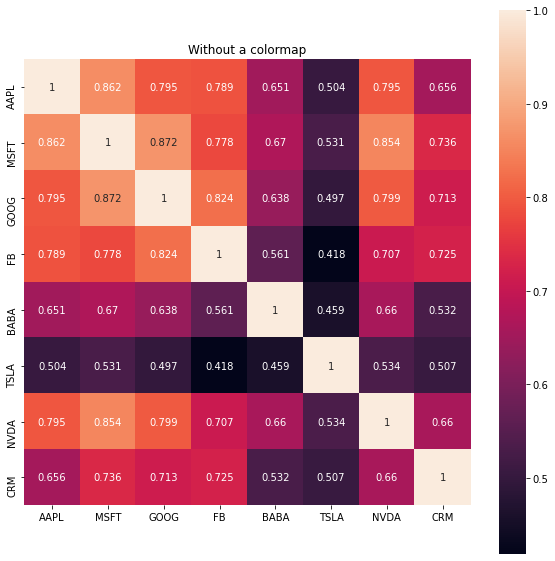

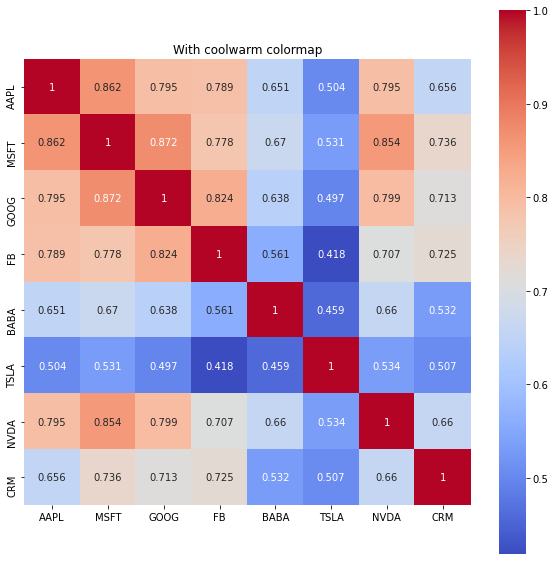

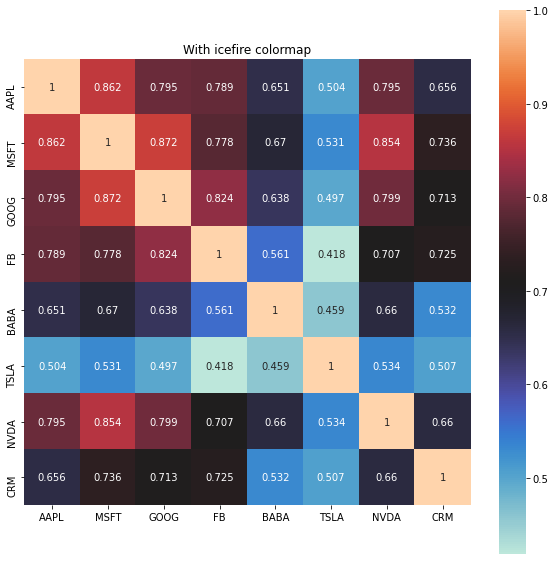

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(return_dataframe.corr(), annot=True, fmt ='.3g', square=True).set_title('Without a colormap')
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(return_dataframe.corr(), annot=True, fmt ='.3g', cmap='coolwarm', square=True).set_title('With coolwarm colormap')
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(return_dataframe.corr(), annot=True, fmt ='.3g', cmap='icefire', square=True).set_title('With icefire colormap')
plt.show()
# we can add colormaps as cmap = 'a_random_colormap_from_the_documentataion' to make it more presentable
#or we can use as_cmap=True for a color pallete

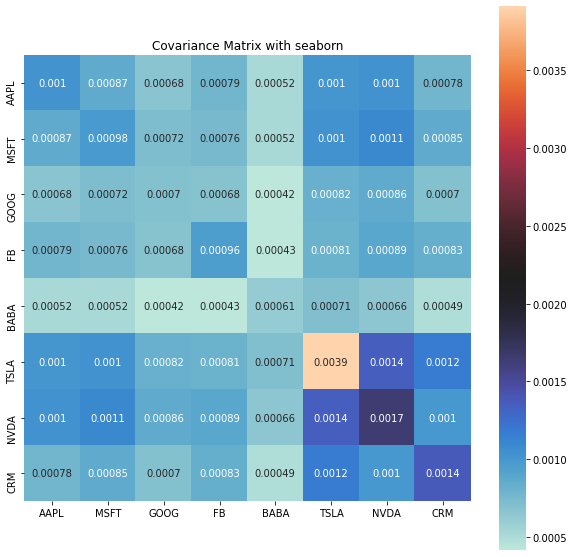

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(covMatrix, annot=True, cmap='icefire', square=True).set_title('Covariance Matrix with seaborn')
plt.show()
#Maybe that is not pretty, but wiil improve if we have more variables 

We can try some plots from this link if they suit our project

https://medium.com/@madhuramiah/some-interesting-visualizations-with-seaborn-python-ad207f50b844

Pairplot

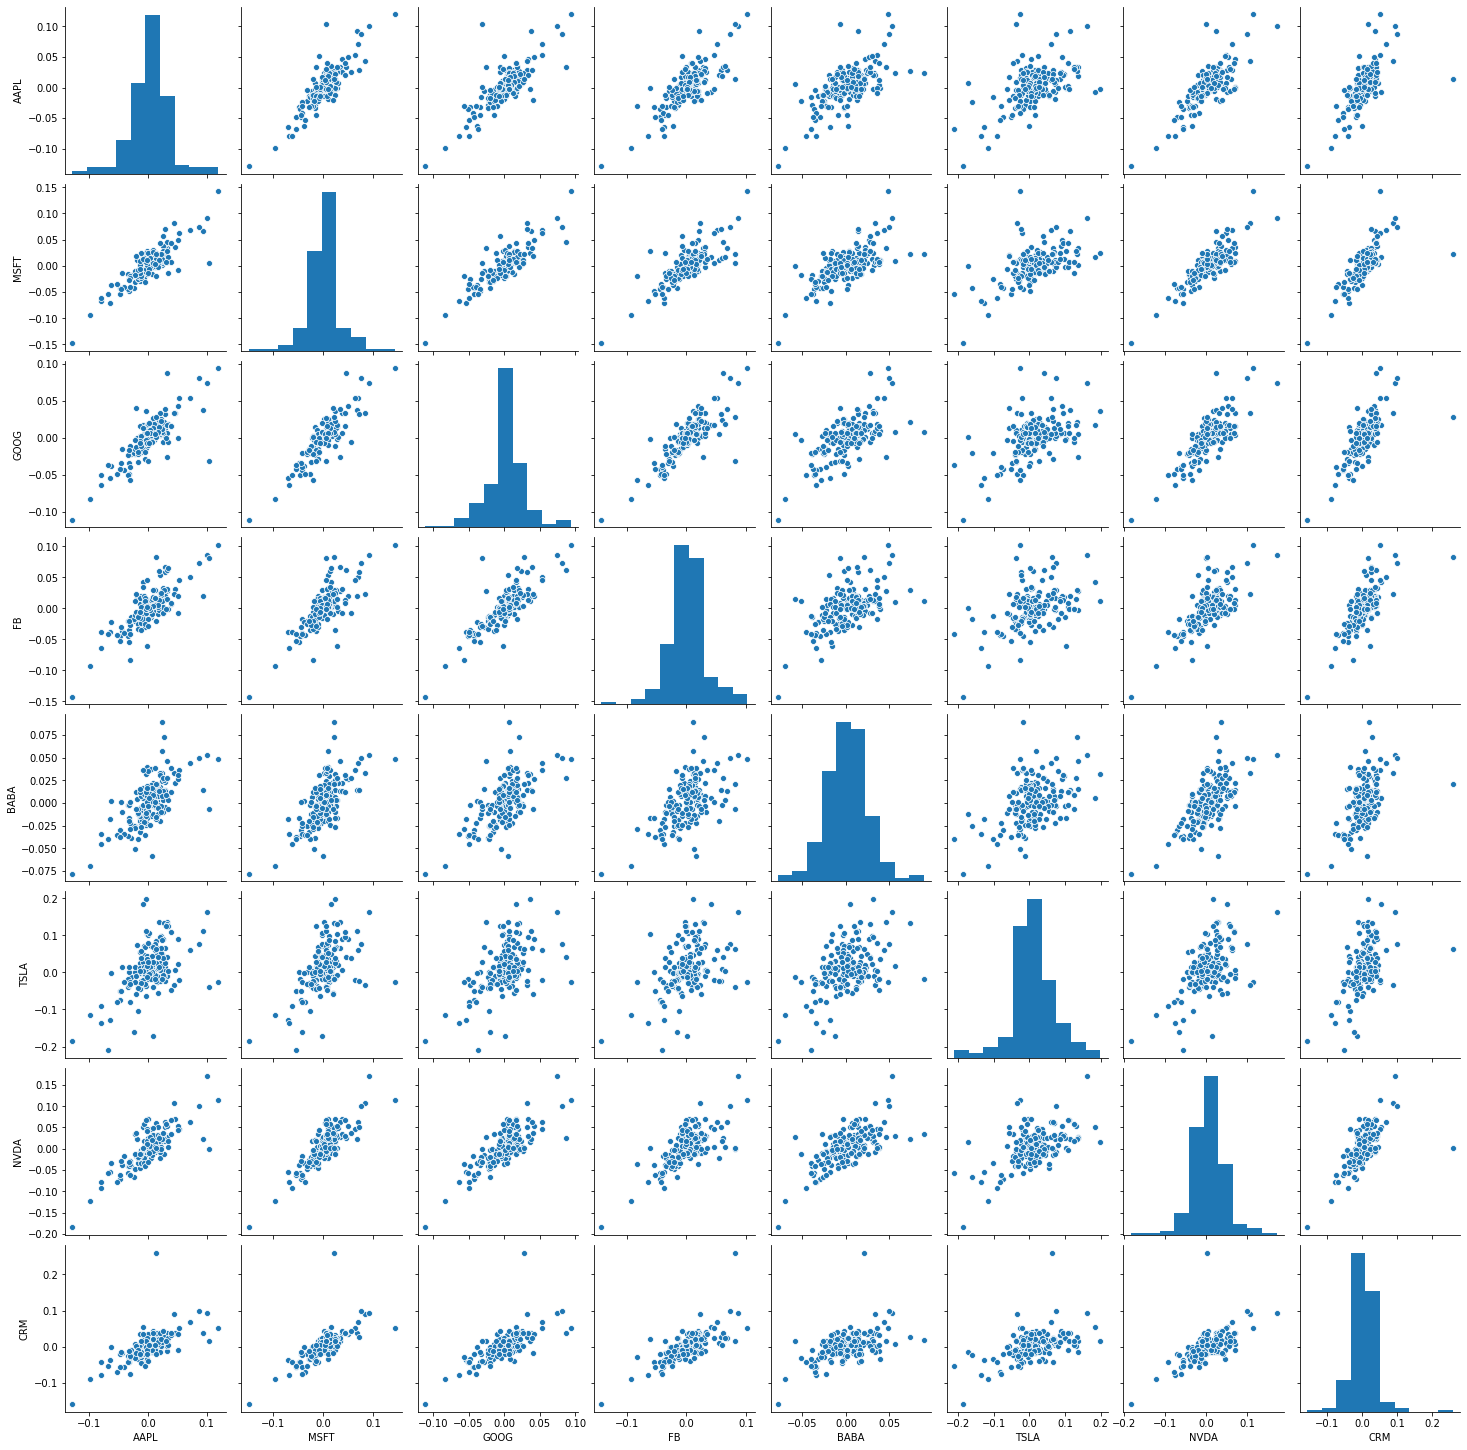

In [65]:
sns.pairplot(return_dataframe)

Boxen plot

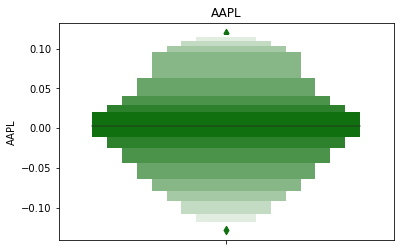

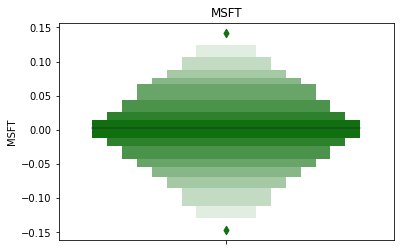

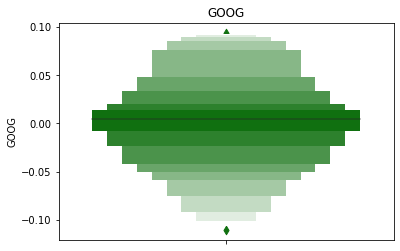

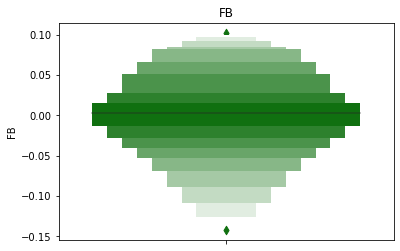

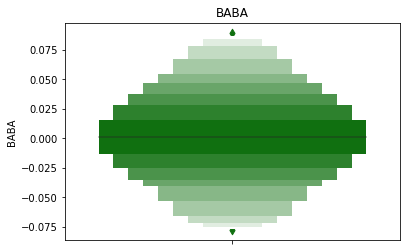

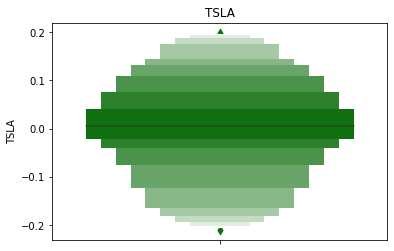

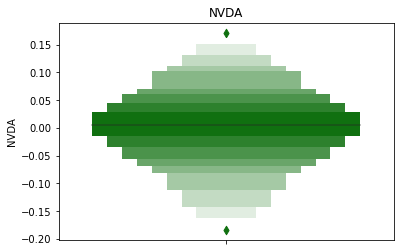

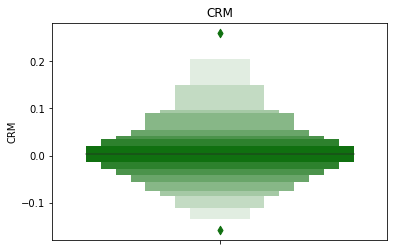

In [66]:
for stock in stock_list:
  sns.boxenplot(y=stock, color="g", scale="linear", data=return_dataframe).set_title(stock)
  plt.show()

Swarm plot

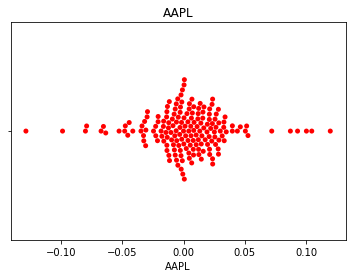

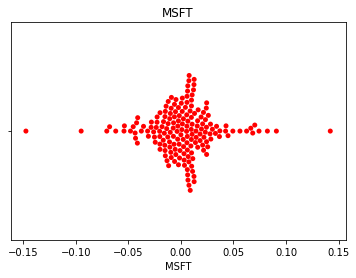

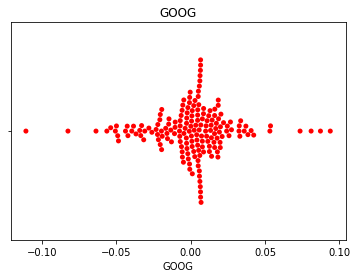

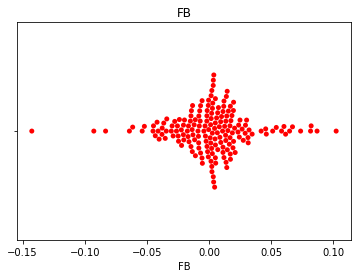

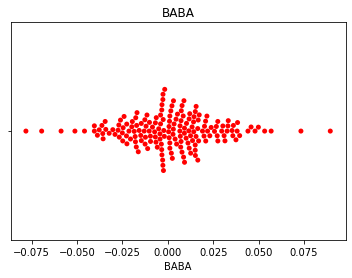

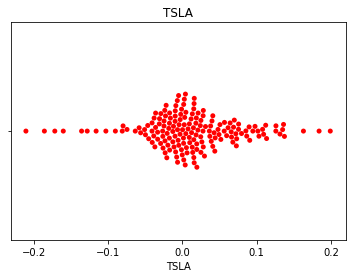

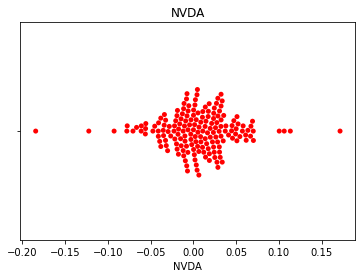

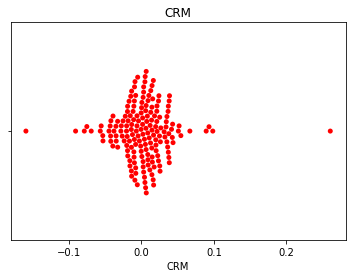

In [67]:
for stock in stock_list:
  sns.swarmplot(x=stock,palette=["r", "c", "y"], data=return_dataframe).set_title(stock)
  plt.show()

We can add trendlines also 

https://seaborn.pydata.org/generated/seaborn.regplot.html

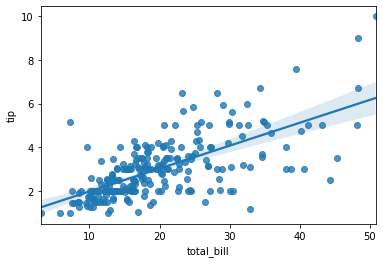

In [68]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

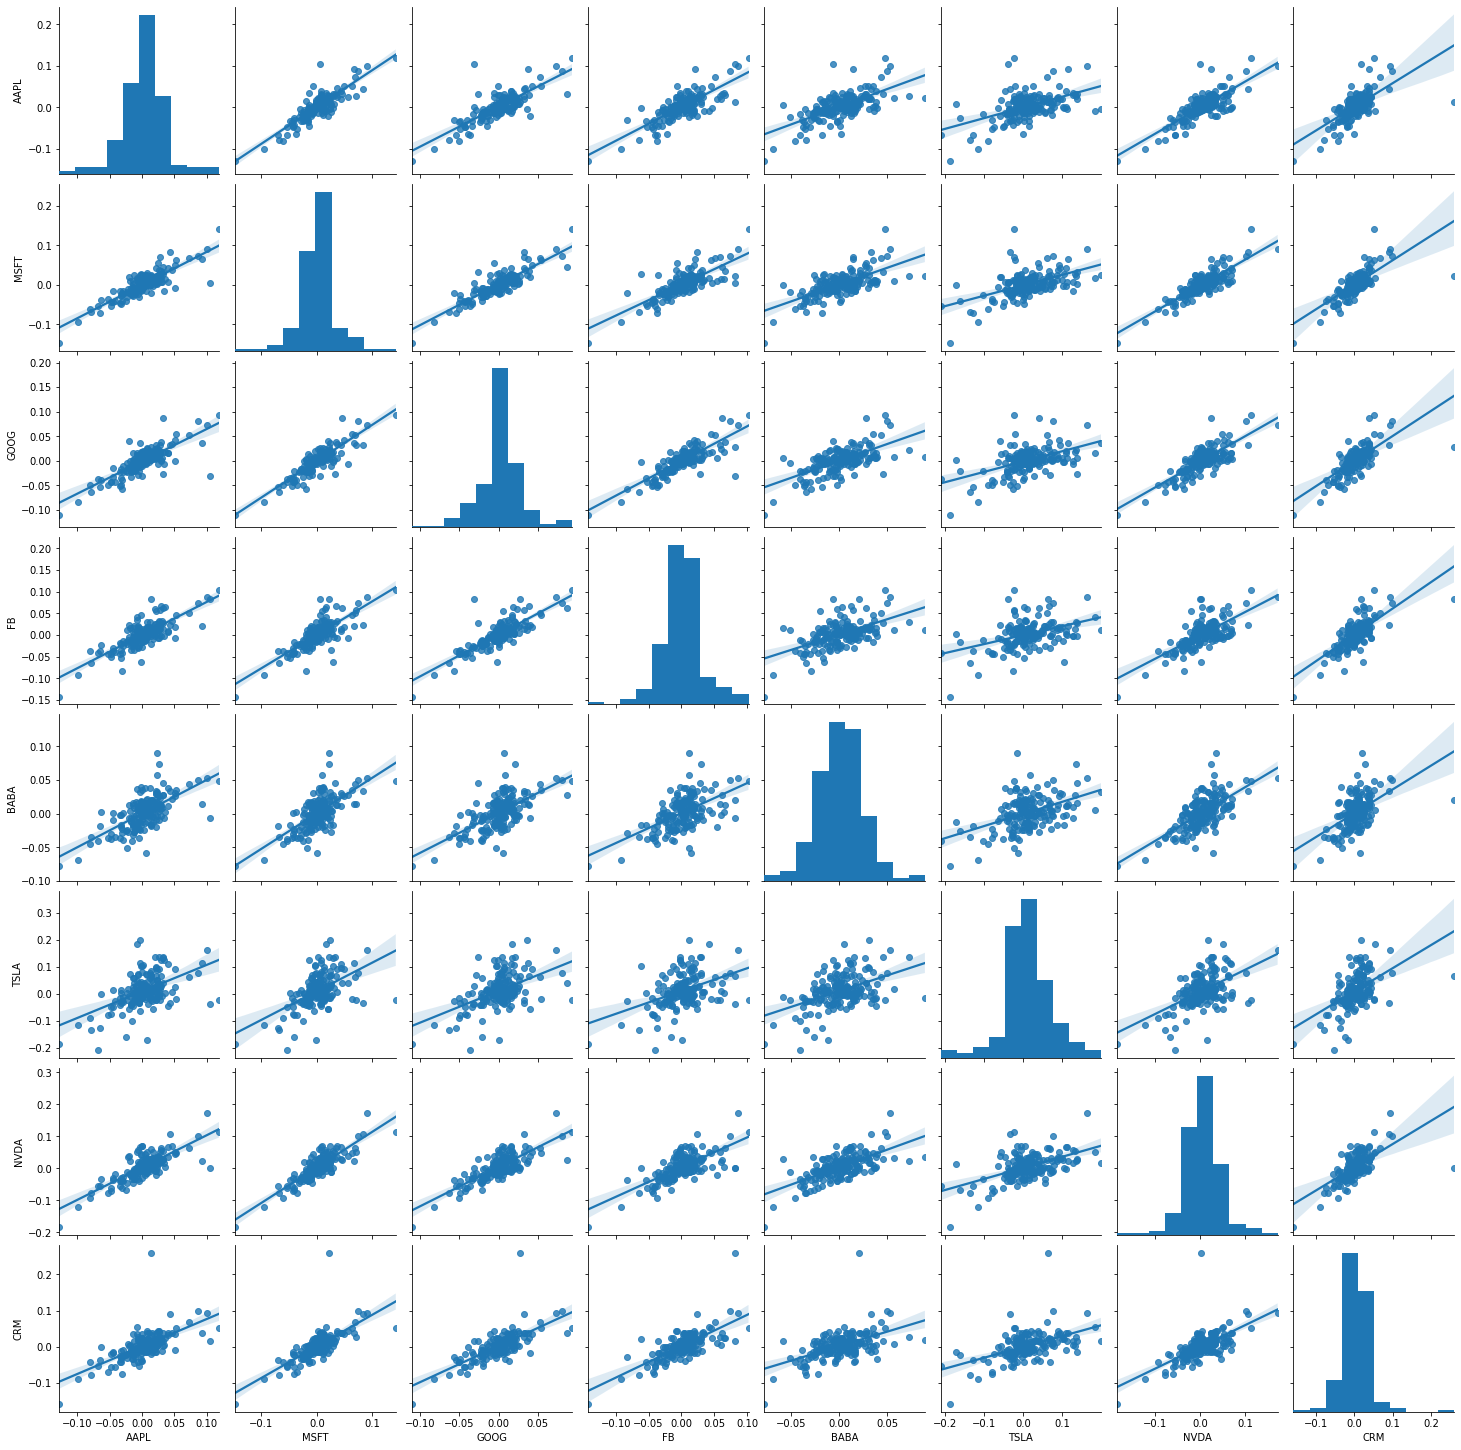

In [69]:
sns.pairplot(return_dataframe, kind='reg')
plt.show()
#Trendlines is a good way to indicate correlation 